Overview of the data

In [1]:
import pandas as pd

# Load data
data = pd.read_csv('../data/raw/data.csv')

# Check shape (rows, columns)
print("Data shape:", data.shape)

# Preview columns and data types
print(data.info())

# Preview first few rows
print(data.head())


Data shape: (95662, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  


Summary Statistics

In [2]:
# Summary statistics for numerical columns
print(data.describe())


       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


Distribution of Numerical Features

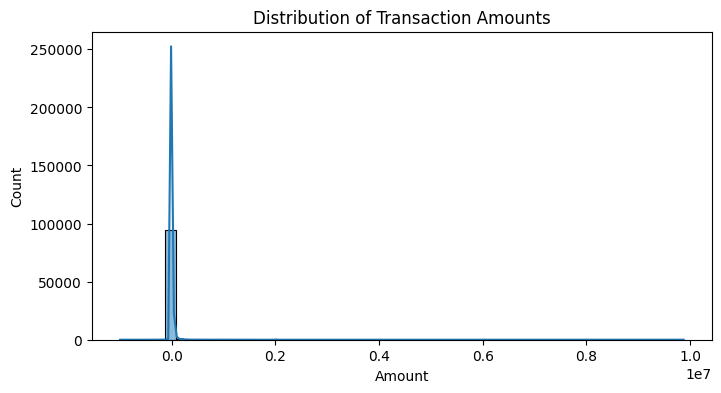

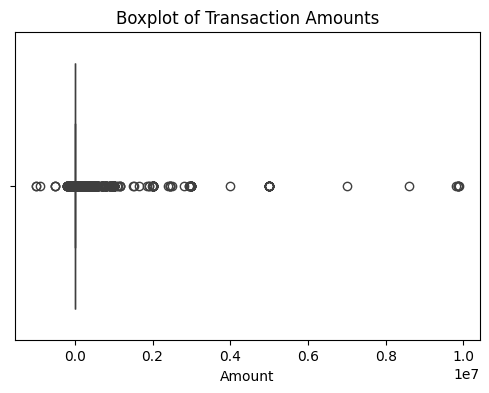

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for 'Amount' feature
plt.figure(figsize=(8, 4))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.show()

# Boxplot to detect outliers in 'Amount'
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['Amount'])
plt.title('Boxplot of Transaction Amounts')
plt.show()


Distribution of Categorical Features

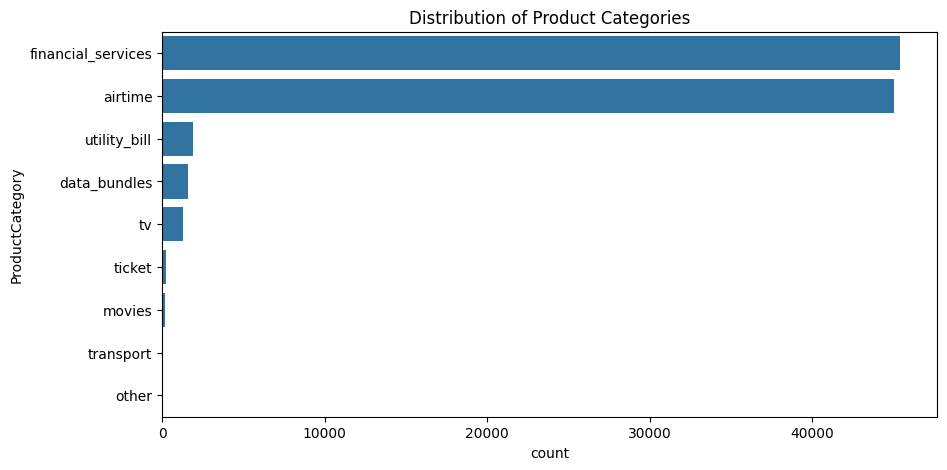

CountryCode
256    95662
Name: count, dtype: int64
ChannelId
ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: count, dtype: int64


In [5]:
# Count plot for 'ProductCategory'
plt.figure(figsize=(10, 5))
sns.countplot(y='ProductCategory', data=data, order=data['ProductCategory'].value_counts().index)
plt.title('Distribution of Product Categories')
plt.show()

# Check unique values in key categorical columns
print(data['CountryCode'].value_counts())
print(data['ChannelId'].value_counts())


Correlation Analysis

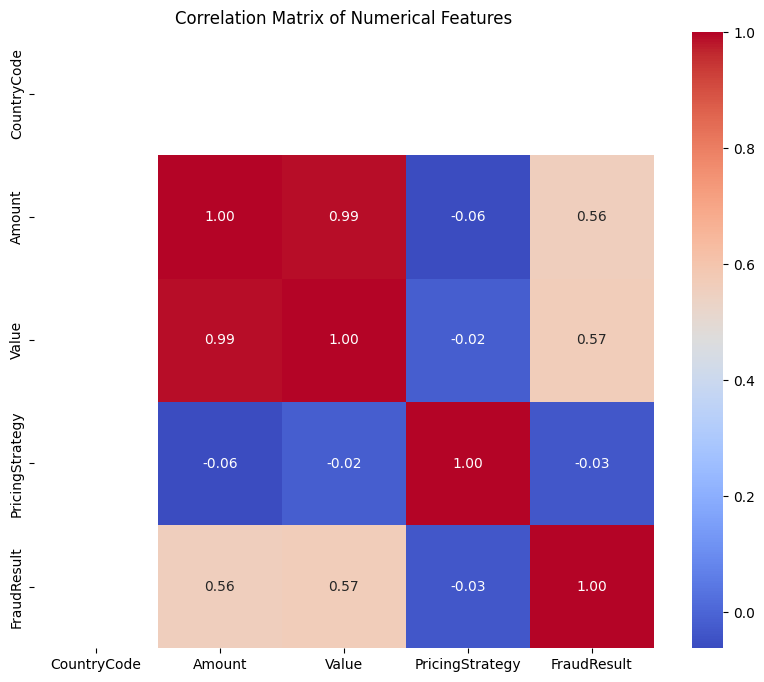

In [7]:
# Select only numeric columns from the dataframe
numeric_data = data.select_dtypes(include=['number'])

# Compute correlation matrix on numeric columns only
corr_matrix = numeric_data.corr()

# Visualize the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()



 Identifying Missing Values

In [8]:
# Count missing values per column
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

# Percentage of missing values
missing_percent = (missing_values / len(data)) * 100
print("Percentage of missing values per column:\n", missing_percent)


Missing values per column:
 TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64
Percentage of missing values per column:
 TransactionId           0.0
BatchId                 0.0
AccountId               0.0
SubscriptionId          0.0
CustomerId              0.0
CurrencyCode            0.0
CountryCode             0.0
ProviderId              0.0
ProductId               0.0
ProductCategory         0.0
ChannelId               0.0
Amount                  0.0
Value                   0.0
TransactionStartTime    0.0
PricingStrategy         0.0
FraudResult             0.0
dtype: float64
